In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
from workspace import nometools as nome

In [ ]:
main_path = Path('..')
preprocessing_path = main_path / 'Data' / 'Preprocessing_LNDR_HNDR'
intersect_path = main_path / 'Data' / 'intersect_regions'

#### GpC methylation in regions

In [ ]:
# region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
region = 'intron.2.start'

In [ ]:
infile = intersect_path / f'GCH.{region}.intersect.bed'
df_GCH_intersect = nome.get_methylation(infile, region=region)

In [ ]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 100: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    plt.axvline(x=0, linestyle='--', c='dimgray')
    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend()
        
    plt.xlabel("DNA position [bp]", fontsize=22)
    plt.xlim(-2000, 1000)
    plt.xticks(fontsize=18)

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab, fontsize=22)
    # plt.ylim(bottom=68, top=80)
    plt.ylim(top=80)
    plt.yticks(fontsize=18)

In [ ]:
plot_avg_methylation_levels(df_GCH_intersect, 'GCH')

#### HNDR and LNDR positioning

In [ ]:
# region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
region = 'intron.2.start'

In [ ]:
infile = intersect_path / f'NDR.{region}.intersect.bed'
df_NDR_pos = nome.get_nuc_positions(infile, region)

In [ ]:
df_NDR_pos.head()

In [ ]:
infile = intersect_path / f'NOR.{region}.intersect.bed'
df_NOR_pos = nome.get_nuc_positions(infile, region)

In [ ]:
df_NOR_pos.head()

In [ ]:
df_NDR_pos.shape, df_NOR_pos.shape

In [ ]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure(figsize=(10, 7))

plt.hist(df_NDR_pos['nuc_start_promo_rel'], bins=60, color='tab:orange', histtype='bar', density=False, label="LNDR start positions", alpha = 0.7)
plt.hist(df_NDR_pos['nuc_end_promo_rel'],  bins=60, color='tab:blue', histtype='bar', density=False, label="LNDR end positions", alpha = 0.6)

plt.xlabel("DNA position [bp]", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(-2000, 1000)
plt.ylim(0, 500)
plt.axvline(x=0, linestyle='--', c='dimgray')
plt.axhline(y=300, linestyle='--', c='red')
plt.legend(fontsize=20)
plt.show()

In [ ]:
plt.figure()

plt.hist(df_NDR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("NDR length [bp]")
plt.ylabel("Density")
plt.show()

In [ ]:
inter_start = -2000
inter_end = 1000
step = 200
inter = range(inter_start,inter_end+1,step)

plt.figure(figsize=(10, 7))

plt.hist(df_NOR_pos['nuc_start_promo_rel'], bins=60, color='tab:orange', histtype='bar', density=False, label="HNDR start positions", alpha = 0.7)
plt.hist(df_NOR_pos['nuc_end_promo_rel'],  bins=60, color='tab:blue', histtype='bar', density=False, label="HNDR end positions", alpha = 0.6)

plt.xlabel("DNA position [bp]", fontsize=22)
plt.ylabel("Frequency", fontsize=22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.xlim(-2000, 1000)
plt.ylim(0, 100)
plt.axvline(x=0, linestyle='--', c='dimgray')
plt.axhline(y=60, linestyle='--', c='red')
plt.legend(fontsize=20)
plt.show()

In [ ]:
plt.figure()

plt.hist(df_NOR_pos['region_length'], bins=30, histtype='bar', density=False)  

plt.xlabel("HNDR length [bp]")
plt.ylabel("Density")
plt.show()

#### CpG Methylation in regions

In [56]:
# region = 'promoter'
# region = 'intron.1.start'
# region = 'intron.1.end'
region = 'intron.2.start'

In [57]:
infile = intersect_path / f'HCG.{region}.intersect.bed'
df_HCG_intersect = nome.get_methylation(infile, region=region)

In [58]:
infile = intersect_path / f'HCG.{region}.intersect.random.bed'
df_HCG_intersect_random = nome.get_methylation(infile, region=region)

In [59]:
def plot_avg_methylation_levels(df, context, select_genes=[], fig = True, c = 'grey', label = None, rel=False, inter_start=None, inter_end=None):
    
    if len(select_genes) == 0: 
        all_meth_pos_rel = list(df['meth_pos_rel'])
        all_meth_rate = list(df['meth_rate'])
        all_coverage = list(df['coverage'])

        assert len(all_meth_pos_rel) == len(all_meth_rate) == len(all_coverage)

        av_dict = dict()
        seen_pos = set()
        for p in range(len(all_meth_pos_rel)):
            rel_pos_x = all_meth_pos_rel[p]
            meth_rate = all_meth_rate[p]
            coverage = all_coverage[p]
            
            #AVERAGE
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []
            
            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
    else:
        av_dict = {}
        seen_pos = set()
        group = df[df['gene_name'].isin(select_genes)]
        for rel_pos_x, meth_rate, coverage in zip(group['meth_pos_rel'], group['meth_rate'], group['coverage']):
            if rel_pos_x not in seen_pos:
                seen_pos.add(rel_pos_x)
                av_dict[rel_pos_x] = {}
                av_dict[rel_pos_x]['meth'] = []
                av_dict[rel_pos_x]['total'] = []

            if context == 'GCH':
                av_dict[rel_pos_x]['meth'].append(coverage*(100-meth_rate)/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            elif context == 'HCG':
                av_dict[rel_pos_x]['meth'].append(meth_rate*coverage/100)
                av_dict[rel_pos_x]['total'].append(coverage)
            else:
                print('Check context')
                return
            

    if fig:
        plt.figure(figsize=(15, 7), facecolor='w', edgecolor='k')

    x = []
    y = []

    for rel_pos_x in sorted(av_dict.keys()):
        if rel:
            if rel_pos_x >= inter_start and rel_pos_x <= inter_end:
                if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                    x.append(rel_pos_x)
                    y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))
        else:
            if len(av_dict[rel_pos_x]['meth']) >= 500: ## to remove artifact
                x.append(rel_pos_x)
                y.append(np.sum(av_dict[rel_pos_x]['meth'])*100/np.sum(av_dict[rel_pos_x]['total']))

    plt.axvline(x=0, linestyle='--', c='dimgray')
    if label is None:
        plt.plot(x, y, "-", color=c, alpha=1.0)
    else:
        plt.plot(x, y, "-", color=c, label=label, alpha=0.7)
        plt.legend(fontsize=22)
        
    plt.xlabel("DNA position [bp]", fontsize=22)
    plt.xlim(-2000, 1000)
    plt.xticks(fontsize=18)

    if context == 'GCH':
        ylab = "100-GpC methylation level"
    if context == 'HCG':
        ylab = "CpG methylation level"
    plt.ylabel(ylab, fontsize=22)
    # plt.ylim(bottom=68, top=80)
    # plt.ylim(top=70)
    plt.yticks(fontsize=18)

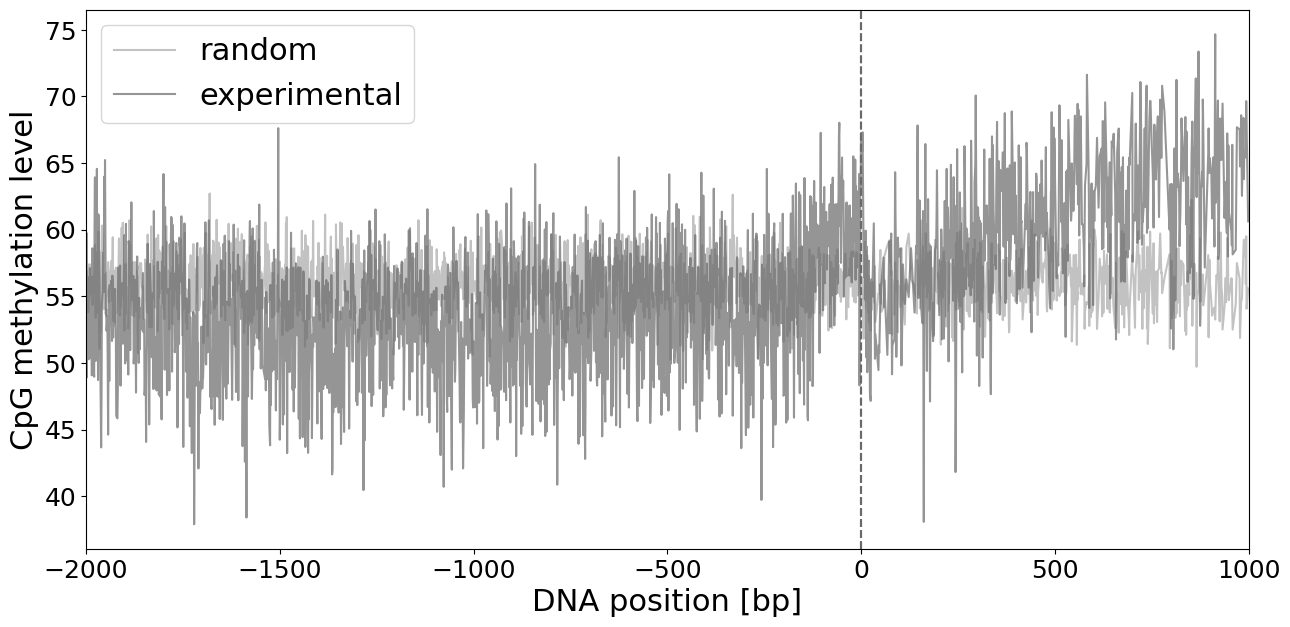

In [60]:
plot_avg_methylation_levels(df_HCG_intersect_random, 'HCG', fig=True, c='darkgray', label='random')
plot_avg_methylation_levels(df_HCG_intersect, 'HCG', fig=False, c='dimgray', label='experimental')

#### Steric Clash Plot

In [5]:
import pickle

In [6]:
steric_path_1kx5 = main_path / 'superposition' / 'clash_1KX5'
steric_path_7v9j = main_path / 'superposition' / 'clash_7V9J'

In [7]:
clash_dict_loc_1kx5 = steric_path_1kx5 / 'clash_dict'
info_dict_loc_1kx5 = steric_path_1kx5 / 'info_nbr_dict'

clash_dict_loc_7v9j = steric_path_7v9j / 'clash_dict'
info_dict_loc_7v9j = steric_path_7v9j / 'info_nbr_dict'

In [8]:
with open(clash_dict_loc_1kx5, 'rb') as fin:
    clash_dict_1kx5 = pickle.load(fin)
with open(info_dict_loc_1kx5, 'rb') as fin:
    info_nbr_dict_1kx5 = pickle.load(fin)

with open(clash_dict_loc_7v9j, 'rb') as fin:
    clash_dict_7v9j = pickle.load(fin)
with open(info_dict_loc_7v9j, 'rb') as fin:
    info_nbr_dict_7v9j = pickle.load(fin)

In [9]:
info_nbr_dict_1kx5

{'model_dnmt_nbr_residues': 947,
 'model_dnmt_nbr_atoms': 7989,
 'dnmt_atoms_consider_clash': 7212}

In [10]:
info_nbr_dict_7v9j

{'model_dnmt_nbr_residues': 947,
 'model_dnmt_nbr_atoms': 7989,
 'dnmt_atoms_consider_clash': 7212}

In [11]:
def get_x_y(clash_dict_, info_nbr_dict_):
    dnmt_atoms_consider_clash = info_nbr_dict_["dnmt_atoms_consider_clash"]
    print('Dnmt atoms for clash', dnmt_atoms_consider_clash)
    x = np.array(sorted(clash_dict_.keys()))
    y = []

    for pos in x:
        all_clashes = 0
        for clash_res in clash_dict_[pos]['steric_clash_list'].keys():
            atom_clashes = clash_dict_[pos]['steric_clash_list'][clash_res]
            nbr_clash_atoms = 0
            seen_atoms = set()
            for ac in atom_clashes: #['X_TYR923_N', 'A_ARG42_CD', 2.0103261]
                dnmt_atom = ac[0]
                nuc_atom = ac[1]
                if dnmt_atom not in seen_atoms:
                    seen_atoms.add(dnmt_atom)
                    nbr_clash_atoms += 1
            
            all_clashes += nbr_clash_atoms

        perc_clash_atoms = (float(all_clashes)/float(dnmt_atoms_consider_clash))*100
        y.append(perc_clash_atoms)

    y = np.array(y)

    return x, y

In [12]:
x_1kx5, y_1kx5 = get_x_y(clash_dict_1kx5, info_nbr_dict_1kx5)
x_7v9j, y_7v9j = get_x_y(clash_dict_7v9j, info_nbr_dict_7v9j)

Dnmt atoms for clash 7212
Dnmt atoms for clash 7212


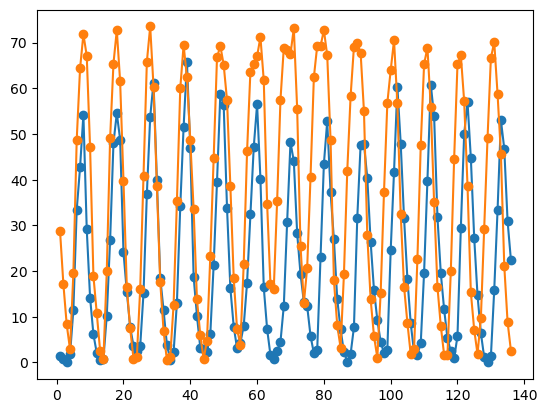

In [14]:
plt.plot(x_1kx5, y_1kx5, marker='o')
plt.plot(x_7v9j-126, y_7v9j, marker='o')

In [15]:
def get_norm_accesibility(y):
    #norm clashed st acc is probability between 0 and 1
    max_clash = np.max(y)
    min_clash = np.min(y)
    print ("max_clash", max_clash)
    print ("min_clash", min_clash)
    diff = max_clash - min_clash
    y_access = []
    for y_val in y:
        norm_val = 100-(float(y_val-min_clash)/float(diff))*100 #100- because is accessibility
        y_access.append(norm_val)

    return np.array(y_access)

In [16]:
y_access_1kx5 = get_norm_accesibility(y_1kx5)
y_access_7v9j = get_norm_accesibility(y_7v9j)

max_clash 65.72379367720465
min_clash 0.0
max_clash 73.53022739877981
min_clash 0.4853022739877981


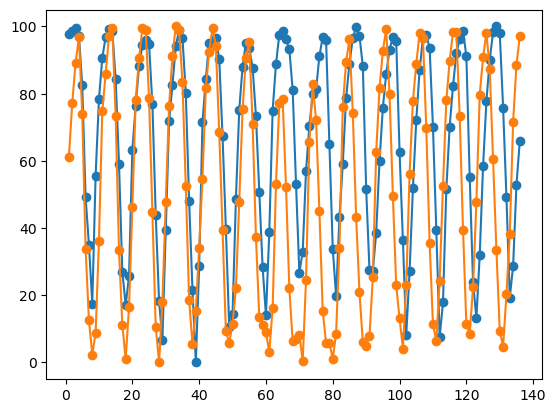

In [17]:
plt.plot(x_1kx5, y_access_1kx5, marker='o')
plt.plot(x_7v9j-126, y_access_7v9j, marker='o')

In [18]:
def get_x_y_dict(x, y, y_access):
    x_y_acc_dict = dict() 
    x_y_dict = dict()
    for i in range(0,len(x)):
        x_y_dict[x[i]] = y[i]
        x_y_acc_dict[x[i]] = y_access[i]
    
    return x_y_dict, x_y_acc_dict

In [19]:
x_y_dict_1kx5, _ = get_x_y_dict(x_1kx5, y_1kx5, y_access_1kx5)
x_y_dict_7v9j, _ = get_x_y_dict(x_7v9j-126, y_7v9j, y_access_7v9j)

In [20]:
from workspace import utils

In [21]:
x_y_clash_dict_norm_1kx5 = utils.normalize_clash_dict(x_y_dict_1kx5)
x_y_clash_dict_norm_7v9j = utils.normalize_clash_dict(x_y_dict_7v9j)

1kx5 pos under thresh true 52
1kx5 pos under thresh norm 44
7v9j pos under thresh true 30
7v9j pos under thresh norm 24


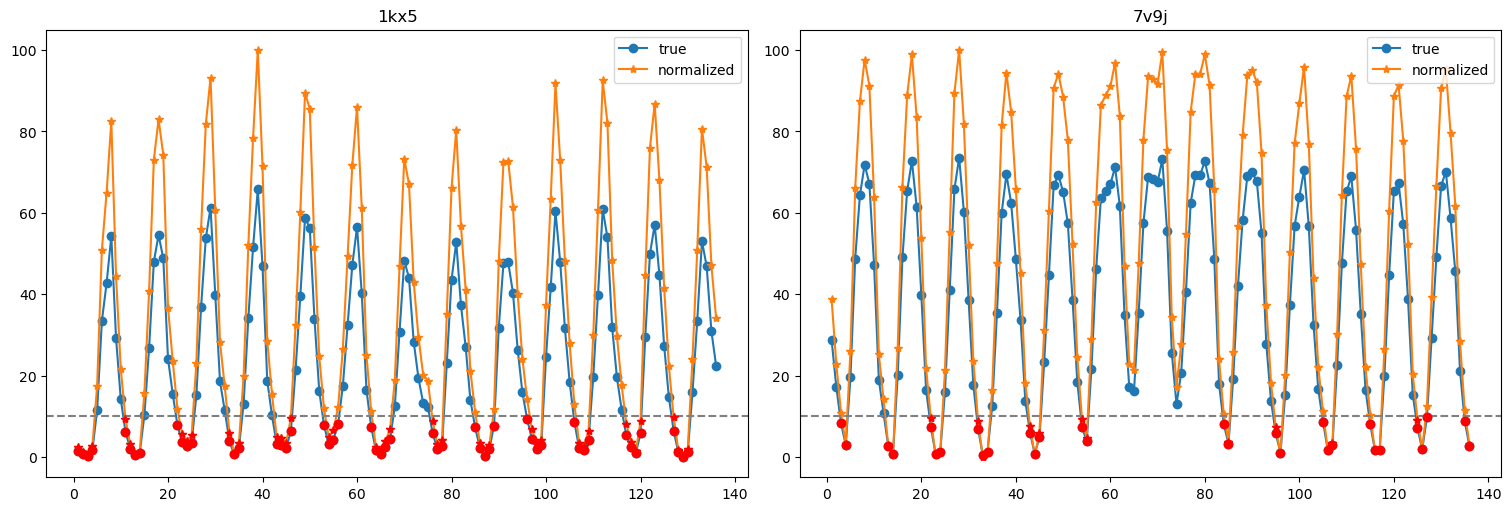

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), layout='constrained')
thresh = 10
ax[0].plot(x_y_dict_1kx5.keys(), x_y_dict_1kx5.values(), marker='o', label='true')
ax[0].plot(x_y_clash_dict_norm_1kx5.keys(), x_y_clash_dict_norm_1kx5.values(), marker='*', label='normalized')
ax[0].set_title('1kx5')
ax[0].axhline(y=thresh, ls='--', color='grey')
ax[0].plot(np.array(list(x_y_dict_1kx5.keys()))[np.array(list(x_y_dict_1kx5.values())) < thresh], 
           np.array(list(x_y_dict_1kx5.values()))[np.array(list(x_y_dict_1kx5.values())) < thresh], 'o', color='red')
ax[0].plot(np.array(list(x_y_clash_dict_norm_1kx5.keys()))[np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh], 
           np.array(list(x_y_clash_dict_norm_1kx5.values()))[np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh], '*', color='red')
ax[0].legend()
print(f'1kx5 pos under thresh true {(np.array(list(x_y_dict_1kx5.values())) < thresh).sum()}')
print(f'1kx5 pos under thresh norm {(np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh).sum()}')

ax[1].plot(x_y_dict_7v9j.keys(), x_y_dict_7v9j.values(), marker='o', label='true')
ax[1].plot(x_y_clash_dict_norm_7v9j.keys(), x_y_clash_dict_norm_7v9j.values(), marker='*', label='normalized')
ax[1].set_title('7v9j')
ax[1].axhline(y=thresh, ls='--', color='grey')
ax[1].plot(np.array(list(x_y_dict_7v9j.keys()))[np.array(list(x_y_dict_7v9j.values())) < thresh], 
           np.array(list(x_y_dict_7v9j.values()))[np.array(list(x_y_dict_7v9j.values())) < thresh], 'o', color='red')
ax[1].plot(np.array(list(x_y_clash_dict_norm_7v9j.keys()))[np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh], 
           np.array(list(x_y_clash_dict_norm_7v9j.values()))[np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh], '*', color='red')
ax[1].legend()

print(f'7v9j pos under thresh true {(np.array(list(x_y_dict_7v9j.values())) < thresh).sum()}')
print(f'7v9j pos under thresh norm {(np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh).sum()}')

1kx5 pos under thresh true 52
7v9j pos under thresh true 30
1kx5 pos under thresh norm 44
7v9j pos under thresh norm 24


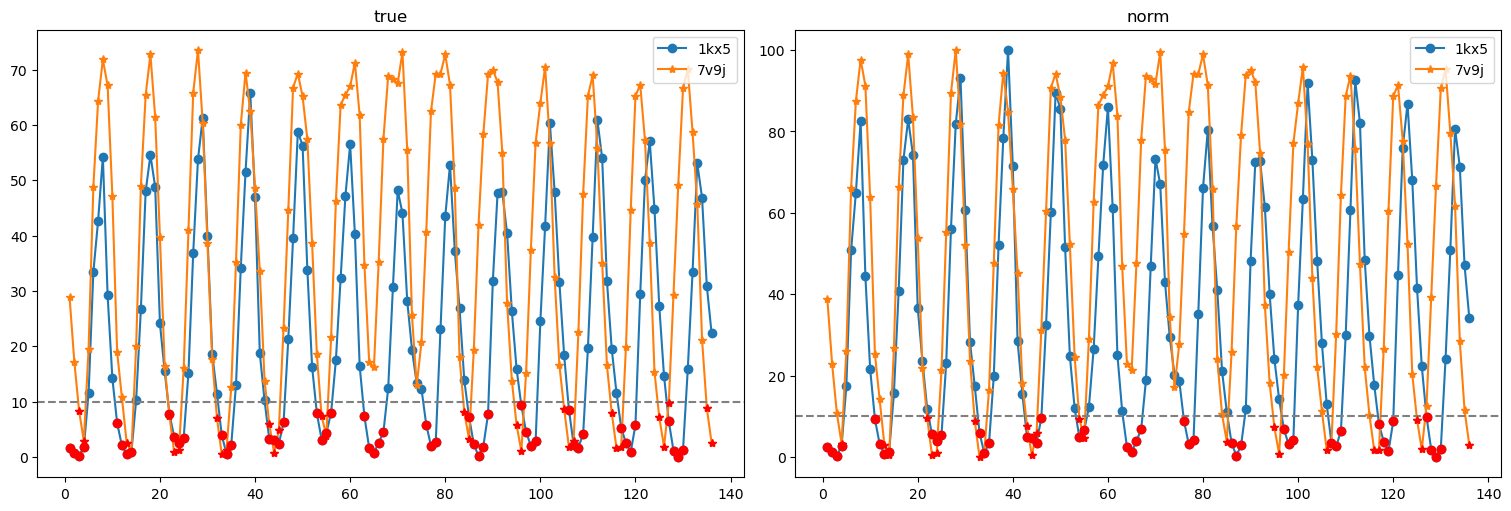

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15,5), layout='constrained')
thresh = 10
ax[0].plot(x_y_dict_1kx5.keys(), x_y_dict_1kx5.values(), marker='o', label='1kx5')
ax[0].plot(x_y_dict_7v9j.keys(), x_y_dict_7v9j.values(), marker='*', label='7v9j')
ax[0].set_title('true')
ax[0].axhline(y=thresh, ls='--', color='grey')
ax[0].plot(np.array(list(x_y_dict_1kx5.keys()))[np.array(list(x_y_dict_1kx5.values())) < thresh], 
           np.array(list(x_y_dict_1kx5.values()))[np.array(list(x_y_dict_1kx5.values())) < thresh], 'o', color='red')
ax[0].plot(np.array(list(x_y_dict_7v9j.keys()))[np.array(list(x_y_dict_7v9j.values())) < thresh], 
           np.array(list(x_y_dict_7v9j.values()))[np.array(list(x_y_dict_7v9j.values())) < thresh], '*', color='red')
ax[0].legend()
print(f'1kx5 pos under thresh true {(np.array(list(x_y_dict_1kx5.values())) < thresh).sum()}')
print(f'7v9j pos under thresh true {(np.array(list(x_y_dict_7v9j.values())) < thresh).sum()}')

ax[1].plot(x_y_clash_dict_norm_1kx5.keys(), x_y_clash_dict_norm_1kx5.values(), marker='o', label='1kx5')
ax[1].plot(x_y_clash_dict_norm_7v9j.keys(), x_y_clash_dict_norm_7v9j.values(), marker='*', label='7v9j')
ax[1].set_title('norm')
ax[1].axhline(y=thresh, ls='--', color='grey')
ax[1].plot(np.array(list(x_y_clash_dict_norm_1kx5.keys()))[np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh], 
           np.array(list(x_y_clash_dict_norm_1kx5.values()))[np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh], 'o', color='red')
ax[1].plot(np.array(list(x_y_clash_dict_norm_7v9j.keys()))[np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh], 
           np.array(list(x_y_clash_dict_norm_7v9j.values()))[np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh], '*', color='red')
ax[1].legend()

print(f'1kx5 pos under thresh norm {(np.array(list(x_y_clash_dict_norm_1kx5.values())) < thresh).sum()}')
print(f'7v9j pos under thresh norm {(np.array(list(x_y_clash_dict_norm_7v9j.values())) < thresh).sum()}')

In [ ]:
# def save_dict(steric_path, x_y_dict):
#     with open(steric_path / 'x_y_dict', 'wb') as fout:
#         pickle.dump(x_y_dict, fout, -1)

In [25]:
## we need these files
# save_dict(steric_path_7v9j, x_y_dict_7v9j)
# save_dict(steric_path_1kx5, x_y_dict_1kx5)

In [ ]:
# with open(steric_path / 'x_y_perc_file_.txt', 'w') as fout:
#     x_y_acc_dict = dict() 
#     x_y_dict = dict()
#     for i in range(0,len(x)):
#         fout.write(str(x[i]) + "----" + str(y[i]) + "\n")
#         x_y_dict[x[i]] = y[i]
#         x_y_acc_dict[x[i]] = y_access[i]

# with open(steric_path / 'x_y_dict_', 'wb') as fout:
#     pickle.dump(x_y_dict, fout, -1)
# with open(steric_path / 'x_y_acc_dict_', 'wb') as fout:
#     pickle.dump(x_y_acc_dict, fout, -1)

#### Plots

In [34]:
def plot_nbr_clash(infile):
    with open(infile, 'rb') as fin:
        x_y_clash_dict = pickle.load(fin)
        
    x = list(x_y_clash_dict.keys())
    y = list(x_y_clash_dict.values())

    fig = plt.figure(figsize=(18, 7))
    ax = plt.subplot(111)

    ax.plot(x, y, linestyle="-", marker="o", linewidth=2)
    for pos in range(0,len(x)):
        ax.text(x[pos]+0.2, y[pos]+0.7, x[pos], fontsize=12)
        
    plt.xlim(0,140)
    plt.xticks(range(0,len(x)+5,5), fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Nucleosome position [bp]", fontsize=18)
    plt.ylabel("DNMT1 atoms clashing [%]", fontsize=18)
    plt.ylim(top=100)

    # ax.axvline(x=74,c="grey",linewidth=2,linestyle="--")

    plt.show()

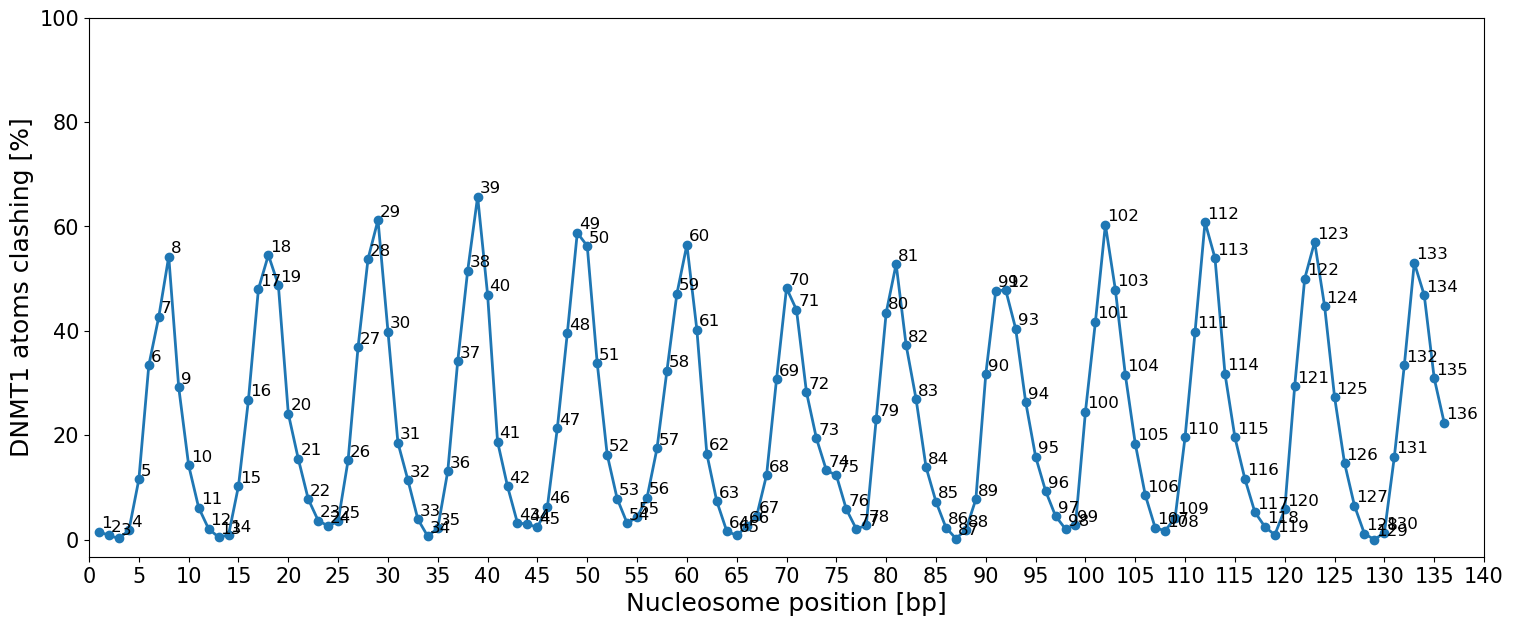

In [35]:
infile = steric_path_1kx5 / 'x_y_dict'
plot_nbr_clash(infile)

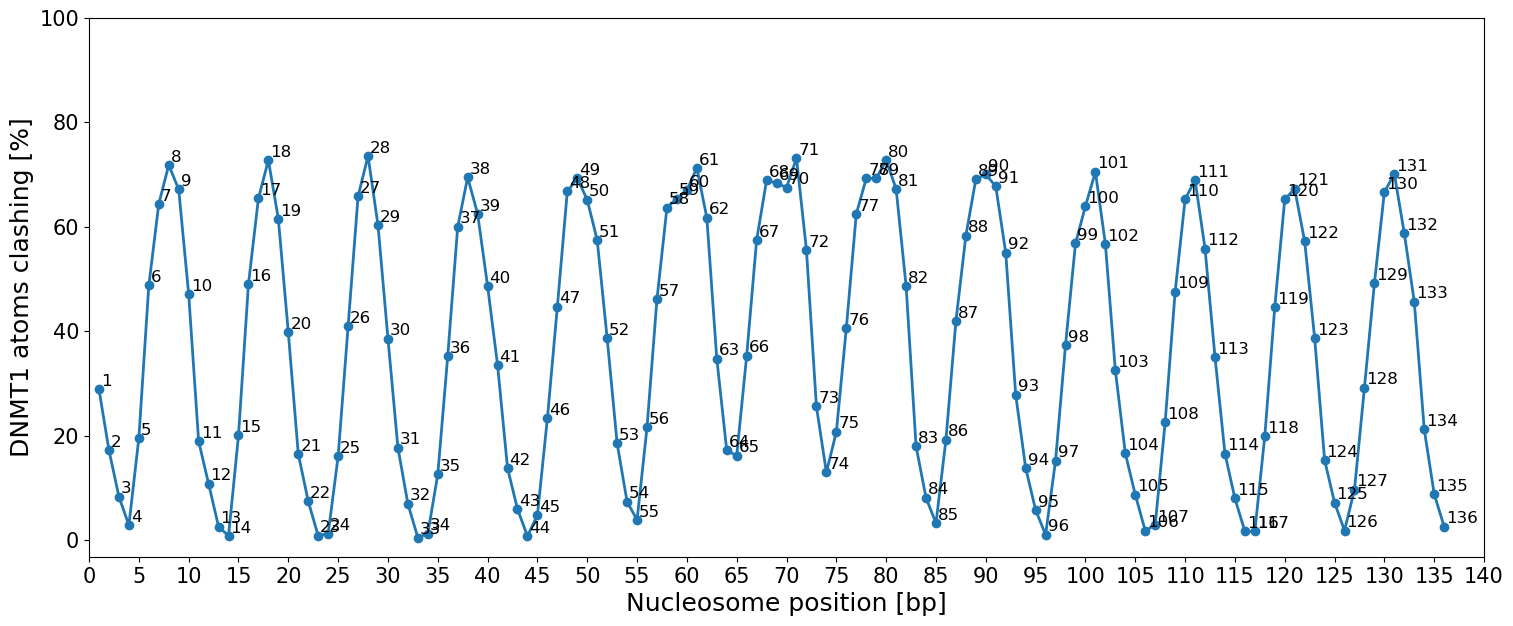

In [36]:
infile = steric_path_7v9j / 'x_y_dict'
plot_nbr_clash(infile)